###Pendahuluan
Laporan ini menyajikan analisis data penjualan dari SuperStore. analisis ini mencakup visualisasi berbagi metrik kinerja utama seperti: Penjualan, Profit, diskon dan kuantitas berdasarkan katgori produk wilayah dan waktu.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df= pd.read_csv('/content/SuperStore - data.csv')
df

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,6/12/2019,6/16/2019,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2017-110422,TB-21400,33180,FUR-FU-10001889,25.2480,3,0.20,4.1028,Furniture,Furnishings,Ultra Door Pull Handle,1/21/2017,1/23/2017,Second Class,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South
9990,CA-2020-121258,DB-13060,92627,FUR-FU-10000747,91.9600,2,0.00,15.6332,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,2/26/2020,3/3/2020,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West
9991,CA-2020-121258,DB-13060,92627,TEC-PH-10003645,258.5760,2,0.20,19.3932,Technology,Phones,Aastra 57i VoIP phone,2/26/2020,3/3/2020,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West
9992,CA-2020-121258,DB-13060,92627,OFF-PA-10004041,29.6000,4,0.00,13.3200,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",2/26/2020,3/3/2020,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West


###Pemeriksaan Data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        9994 non-null   object 
 1   Customer_ID     9994 non-null   object 
 2   Postal_Code     9994 non-null   int64  
 3   Product_ID      9994 non-null   object 
 4   Sales           9994 non-null   float64
 5   Quantity        9994 non-null   int64  
 6   Discount        9994 non-null   float64
 7   Profit          9994 non-null   float64
 8   Category        9994 non-null   object 
 9   Sub-Category    9994 non-null   object 
 10  Product_Name    9994 non-null   object 
 11  Order_Date      9994 non-null   object 
 12  Ship_Date       9994 non-null   object 
 13  Ship_Mode       9994 non-null   object 
 14  Customer_Name   9994 non-null   object 
 15  Segment         9994 non-null   object 
 16  Country/Region  9994 non-null   object 
 17  City            9994 non-null   o

In [4]:
df.describe()

,Postal_Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.371023,229.858001,3.789574,0.156203,28.656896
std,32063.704510,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


###Pembersihan Data [Cek Duplikat]

In [21]:
df= df.drop_duplicates()

In [22]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9993, dtype: bool

###Hitung Nilai 0


In [29]:
df.isna(). sum()

Order_ID          0
Customer_ID       0
Postal_Code       0
Product_ID        0
Sales             0
Quantity          0
Discount          0
Profit            0
Category          0
Sub-Category      0
Product_Name      0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_Name     0
Segment           0
Country/Region    0
City              0
State             0
Region            0
dtype: int64

###EDA

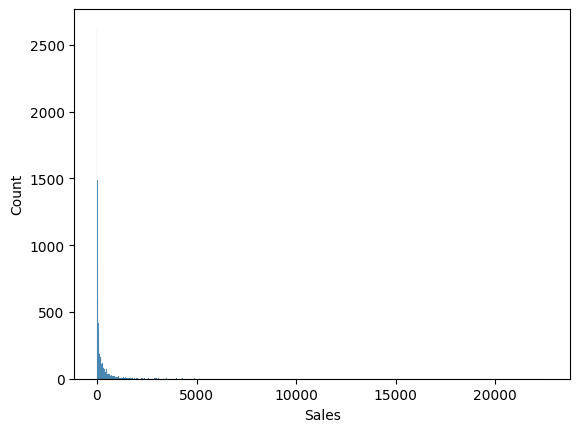

In [38]:
sns.histplot(df['Sales'])
plt.show()

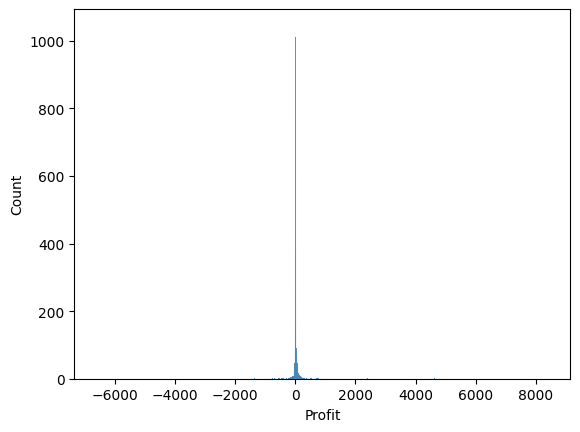

In [39]:
sns.histplot(df['Profit'])
plt.show()

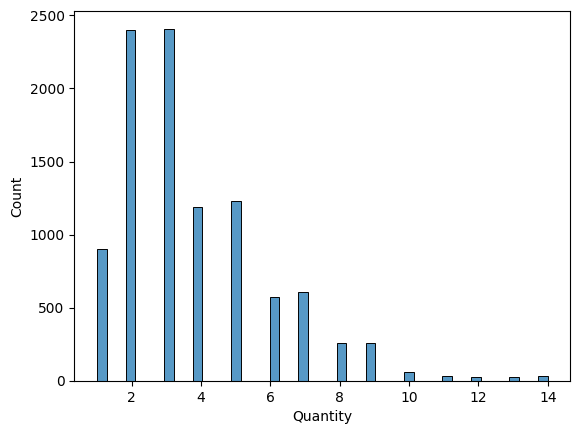

In [40]:
sns.histplot(df['Quantity'])
plt.show()

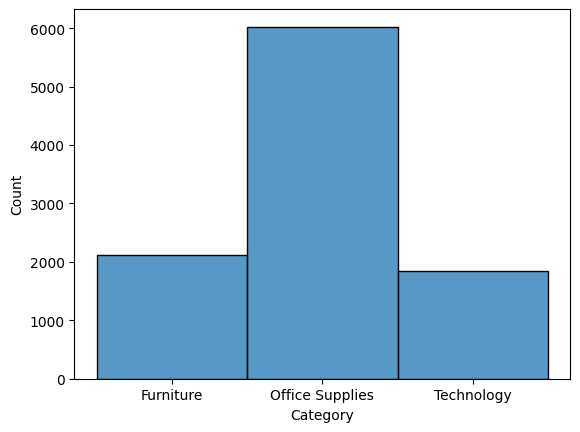

In [41]:
sns.histplot(df['Category'])
plt.show()

###Analisis Penjualan dan Profit
1. Total Penjualan dan Profit Berdasarkan Wilayah

In [57]:
#Agregasi
Wilayah_Penjualan = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

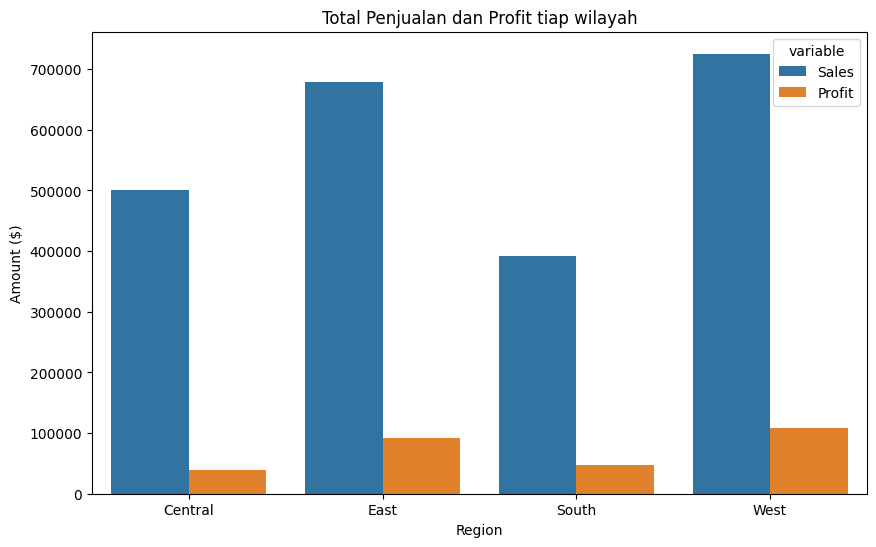

In [61]:
melted_data = pd.melt(Wilayah_Penjualan, id_vars=['Region'], value_vars=['Sales', 'Profit'], var_name='variable', value_name='Value')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Value', hue='variable', data=melted_data)
plt.title('Total Penjualan dan Profit tiap wilayah')
plt.xlabel('Region')
plt.ylabel('Amount ($)')
plt.show()

2. Tren Penjualan Bulanan

In [67]:
#konversi Order_Date ke datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

#Extract Year dan Month from the Order_Date
df['YearsMonth'] = df['Order_Date'].dt.to_period('M')

#Agregasi Sales dari Month
Monthly_sales = df.groupby('YearsMonth')['Sales'].sum().reset_index()

#Conversi YearMonth ke format String #digunakan untuk Ploting
Monthly_sales ['YearsMonth'] = Monthly_sales['YearsMonth'].astype(str)

<ipython-input-67-f702d50c3318>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order_Date'] = pd.to_datetime(df['Order_Date'])
<ipython-input-67-f702d50c3318>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsMonth'] = df['Order_Date'].dt.to_period('M')


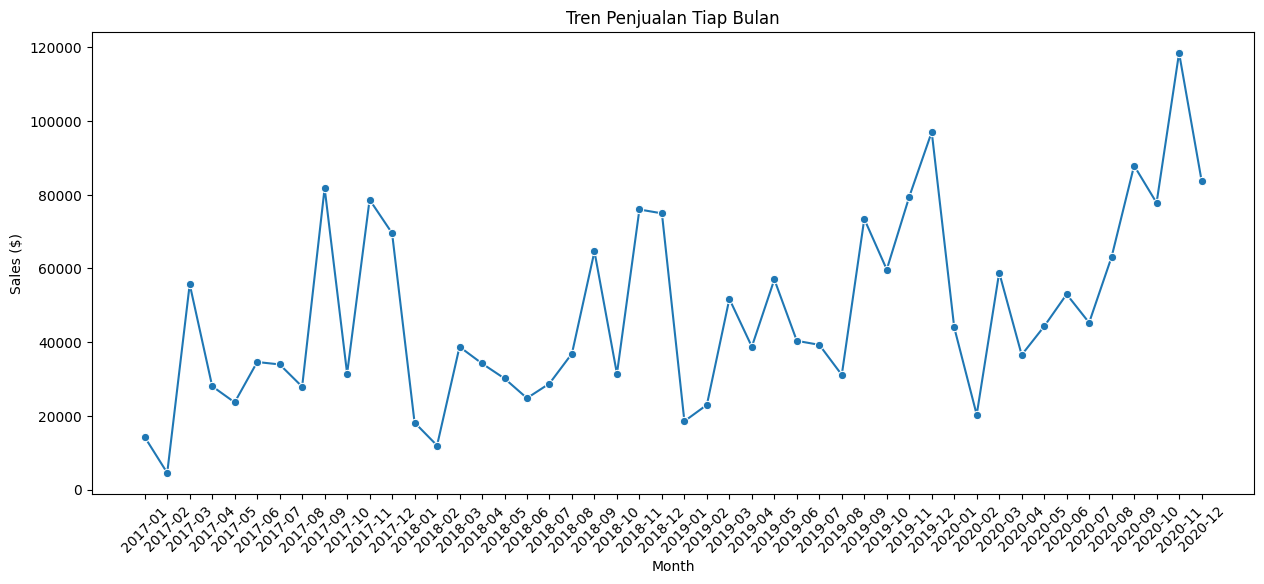

In [73]:
#Plotting
plt.figure(figsize=(15,6))
sns.lineplot(x='YearsMonth',y='Sales', data= Monthly_sales, marker='o')
plt.title('Tren Penjualan Tiap Bulan')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.show()

3. Profit Berdasarkan Kategori Produk

<ipython-input-83-0985008ad405>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit', data=Profit_Category, palette='viridis')


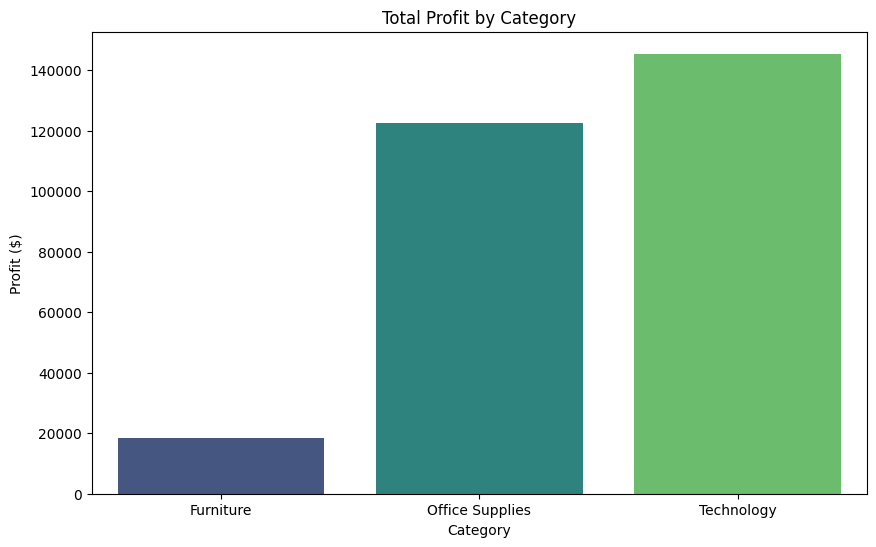

In [83]:
#Agregasi
Profit_Category = df.groupby('Category')['Profit']. sum(). reset_index()
#Plotting
# plt.figure(figsize=(15,6))
# sns.barplot(X='Category', y='Profit', data=Profit_Category, palette='Viridis')
# plt.title('Profi Berdasarkan Kategori Produk')
# plt.xlabel('Category')
# plt.ylabel('Profit ($)')
# plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=Profit_Category, palette='viridis')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit ($)')
plt.show()

###Analisis Diskon dan Profit
1. Pengaruh Diskon Terhadap Profit [ScatterPlot]

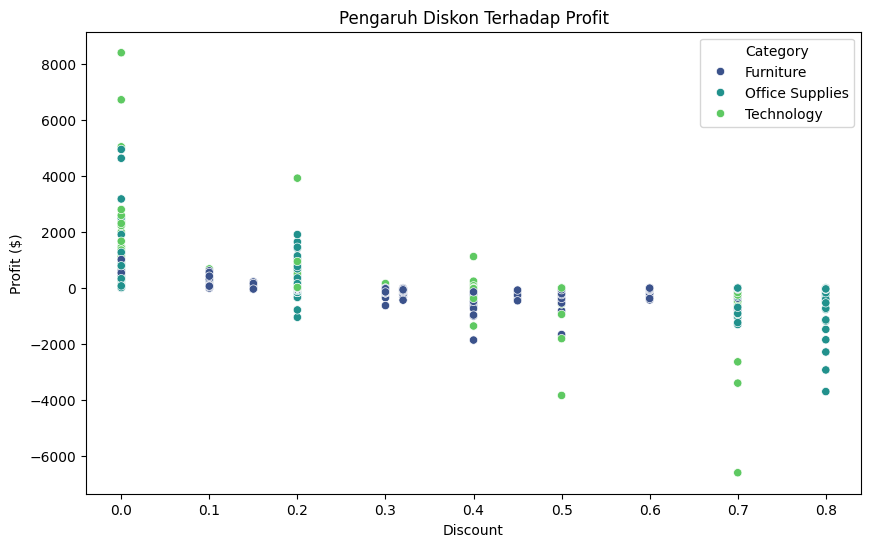

In [88]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Category', palette='viridis')
plt.title('Pengaruh Diskon Terhadap Profit')
plt.xlabel('Discount')
plt.ylabel('Profit ($)')
plt.legend(title='Category')
plt.show()


##BarPlot

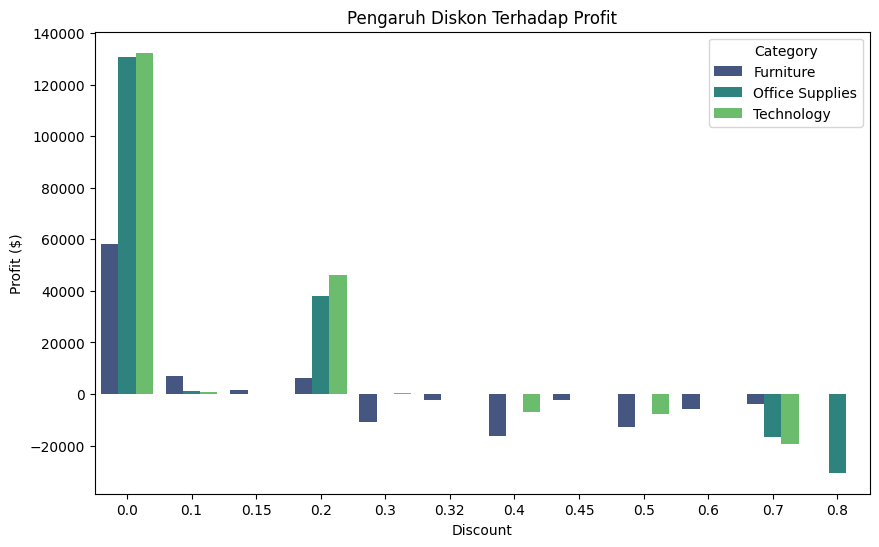

In [89]:
discount_profit = df.groupby(['Category', 'Discount'])['Profit'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Discount', y='Profit', hue='Category', data=discount_profit, palette='viridis')
plt.title('Pengaruh Diskon Terhadap Profit')
plt.xlabel('Discount')
plt.ylabel('Profit ($)')
plt.legend(title='Category')
plt.show()

### Analisis Penjualan Berdasarkan Kategory  dan Sub_Category

In [97]:
#Agregasi
category_subcategory_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().unstack()

# Plotting
# plt.figure(figsize=(20, 8))
# sns.heatmap(category_subcategory_sales, cmap='YlGnBu', annot=True, fmt=".1f")
# plt.title('Sales by Category and Sub-Category')
# plt.xlabel('Sub-Category')
# plt.ylabel('Category')
# plt.show()

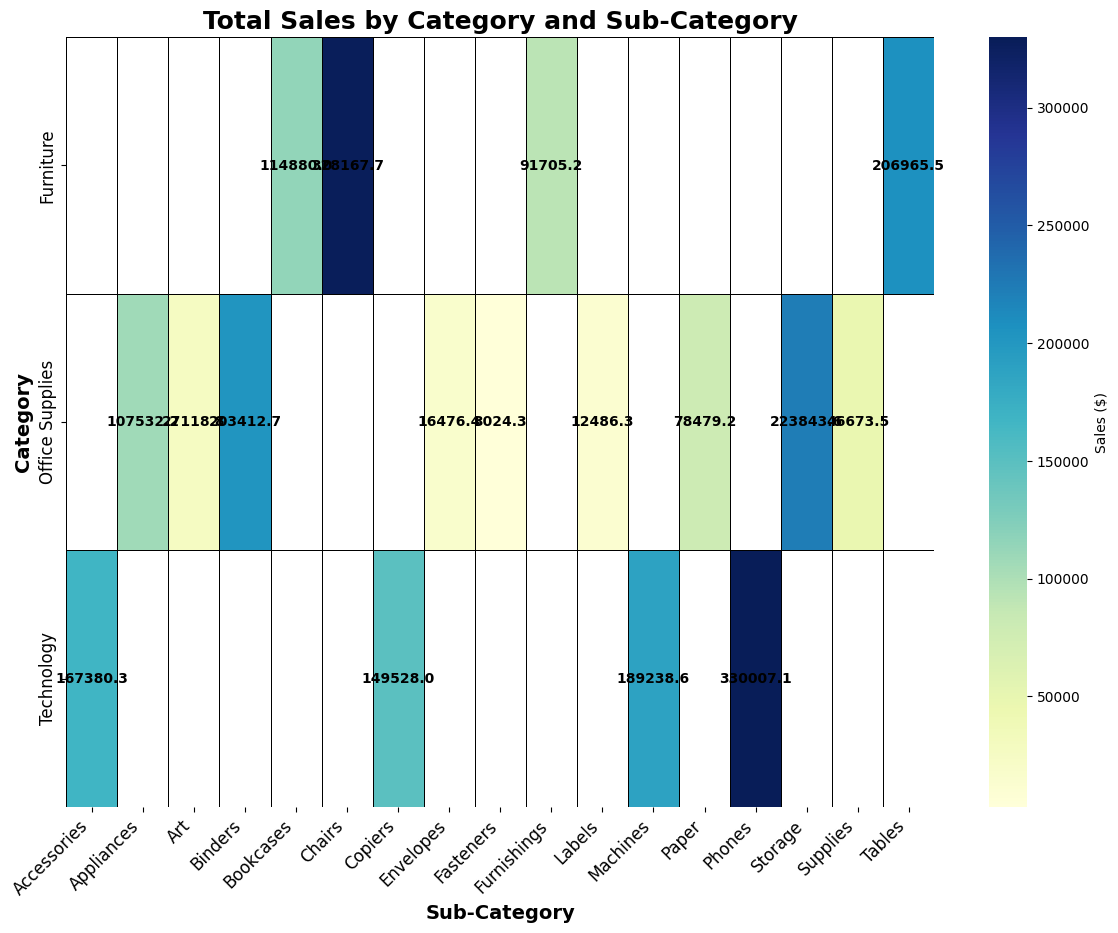

In [98]:

# Plotting heatmap
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(category_subcategory_sales, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5, linecolor='black', cbar_kws={'label': 'Sales ($)'})

plt.title('Total Sales by Category and Sub-Category', fontsize=18, weight='bold')
plt.xlabel('Sub-Category', fontsize=14, weight='bold')
plt.ylabel('Category', fontsize=14, weight='bold')

for text in heatmap.texts:
    text.set_size(10)
    text.set_weight('bold')
    text.set_color('black')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()